<a href="https://colab.research.google.com/github/SJhawar1010/Speech-Processing/blob/main/Satyam_554_SPR_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Markov Model (HMM) for Phoneme Transitions in the Word "Speech"

In this lab experiment, we implement a Hidden Markov Model (HMM) to simulate phoneme transitions for the word **"speech"** in speech processing. The word "speech" is divided into the following phonemes (hidden states):

- **/s/**
- **/p/**
- **/ie:/** (long ee)
- **/tS/** (ch sound)

**Observations** represent measurable acoustic properties such as **energy**, **pitch**, and **duration**.

The HMM is defined by the following parameters:
- **Initial Probabilities**: The probability of starting with a particular phoneme.
- **Transition Probabilities**: The probability of transitioning from one phoneme to another.
- **Emission Probabilities**: The probability of emitting an observation given a phoneme.

Let's proceed with the implementation step by step.

### (a) Represent the HMM parameters (initial probabilities, transition probabiliities, and emission probabilities) using suitable data structures in Python.



In [1]:
states = ['/s/', '/p/', '/ie:/', '/tS/']
observations = ['Energy', 'Pitch', 'Duration']

initial_prob = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tS/': 0.0
}

transition_prob = {
    '/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0},
    '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1},
    '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8},
    '/tS/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}
}

emission_prob = {
    '/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}

print("Initial Probabilities:", initial_prob)
print("\nTransition Probabilities:", transition_prob)
print("\nEmission Probabilities:", emission_prob)

Initial Probabilities: {'/s/': 1.0, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.0}

Transition Probabilities: {'/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0}, '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1}, '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8}, '/tS/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}}

Emission Probabilities: {'/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}, '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}, '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}, '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}}


### Explanation

- **States**: Represent the phonemes in the word "speech".
- **Observations**: Acoustic properties measurable during speech.
- **Initial Probabilities**: Only `/s/` has a probability of 1.0 to start the word.
- **Transition Probabilities**: Define how likely it is to move from one phoneme to another.
- **Emission Probabilities**: Define the likelihood of observing a particular acoustic property given a phoneme.

These parameters are represented using Python dictionaries for easy access and manipulation.

### (b) Write a function to neatly display the transition and emission matrices along with the initial probabilities.

In [2]:
import pandas as pd

def display_hmm(initial_prob, transition_prob, emission_prob):
    print("Initial Probabilities:")
    init_df = pd.DataFrame(list(initial_prob.items()), columns=['Phoneme', 'Probability'])
    print(init_df.to_string(index=False))
    print("\nTransition Probabilities:")
    trans_df = pd.DataFrame(transition_prob).T
    print(trans_df.to_string())
    print("\nEmission Probabilities:")
    emit_df = pd.DataFrame(emission_prob).T
    print(emit_df.to_string())

display_hmm(initial_prob, transition_prob, emission_prob)

Initial Probabilities:
Phoneme  Probability
    /s/          1.0
    /p/          0.0
  /ie:/          0.0
   /tS/          0.0

Transition Probabilities:
       /s/  /p/  /ie:/  /tS/
/s/    0.1  0.8    0.1   0.0
/p/    0.0  0.1    0.8   0.1
/ie:/  0.0  0.0    0.2   0.8
/tS/   0.2  0.0    0.0   0.8

Emission Probabilities:
       Energy  Pitch  Duration
/s/       0.7    0.2       0.1
/p/       0.5    0.3       0.2
/ie:/     0.3    0.5       0.2
/tS/      0.4    0.4       0.2


### Display Function

The `display_hmm` function utilizes Pandas DataFrames to neatly display the initial, transition, and emission probabilities. This enhances readability and provides a clear overview of the HMM parameters.

### (c) Write a program to generate a single sequence of phonemes and corresponding acoustic observations for the word speech based on the defined probabilities.

In [3]:
import numpy as np

def generate_sequence(initial_prob, transition_prob, emission_prob, observations, length=4):
    state_sequence = []
    observation_sequence = []

    current_state = np.random.choice(list(initial_prob.keys()), p=list(initial_prob.values()))
    state_sequence.append(current_state)

    obs = np.random.choice(observations, p=list(emission_prob[current_state].values()))
    observation_sequence.append(obs)

    for _ in range(1, length):
        current_transition_probs = transition_prob[current_state]
        next_state = np.random.choice(list(current_transition_probs.keys()), p=list(current_transition_probs.values()))
        state_sequence.append(next_state)

        obs = np.random.choice(observations, p=list(emission_prob[next_state].values()))
        observation_sequence.append(obs)

        current_state = next_state

    return state_sequence, observation_sequence

phoneme_seq, observation_seq = generate_sequence(initial_prob, transition_prob, emission_prob, observations, length=4)

print("Generated Phoneme Sequence:", phoneme_seq)
print("Corresponding Observations:", observation_seq)

Generated Phoneme Sequence: ['/s/', '/s/', '/p/', '/ie:/']
Corresponding Observations: ['Energy', 'Energy', 'Pitch', 'Energy']


### Sequence Generation

The `generate_sequence` function simulates the process of phoneme transitions and corresponding acoustic observations:

1. **Initialization**: Starts with the initial phoneme based on the initial probabilities.
2. **State Transition**: At each step, transitions to the next phoneme based on the transition probabilities.
3. **Emission**: For each phoneme, an observation is emitted based on the emission probabilities.

This simulation helps in understanding how phonemes and observations evolve in the HMM framework.

### (d) Write an inference for the above HMM implementation

In [4]:
def viterbi(observations_seq, states, initial_prob, transition_prob, emission_prob):
    V = [{}]
    path = {}

    for state in states:
        V[0][state] = initial_prob[state] * emission_prob[state][observations_seq[0]]
        path[state] = [state]

    for t in range(1, len(observations_seq)):
        V.append({})
        new_path = {}

        for current_state in states:
            (prob, state_max) = max(
                [(V[t-1][prev_state] * transition_prob[prev_state][current_state] * emission_prob[current_state][observations_seq[t]], prev_state)
                 for prev_state in states],
                key=lambda x: x[0]
            )
            V[t][current_state] = prob
            new_path[current_state] = path[state_max] + [current_state]

        path = new_path

    n = len(observations_seq) - 1
    (prob, state_max) = max([(V[n][state], state) for state in states], key=lambda x: x[0])
    return path[state_max], prob

example_observations = ['Energy', 'Pitch', 'Duration', 'Energy']

most_probable_path, probability = viterbi(example_observations, states, initial_prob, transition_prob, emission_prob)

print("Most Probable Phoneme Sequence:", most_probable_path)
print("Probability of the Sequence:", probability)

Most Probable Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/tS/']
Probability of the Sequence: 0.008601600000000001


### Inference using Viterbi Algorithm

The **Viterbi Algorithm** is used to find the most probable sequence of hidden states (phonemes) that results in a sequence of observed events (acoustic properties).

**Steps Involved**:

1. **Initialization**: Calculate the initial probabilities for each state.
2. **Recursion**: For each subsequent observation, calculate the probability of each state by considering all possible transitions from the previous states.
3. **Termination**: Identify the state with the highest probability at the final step.
4. **Path Backtracking**: Trace back the path that led to the highest probability.

In this implementation, given an observation sequence, the Viterbi algorithm determines the most probable sequence of phonemes that could have generated those observations.

### Visualization of Transition and Emission Probabilities

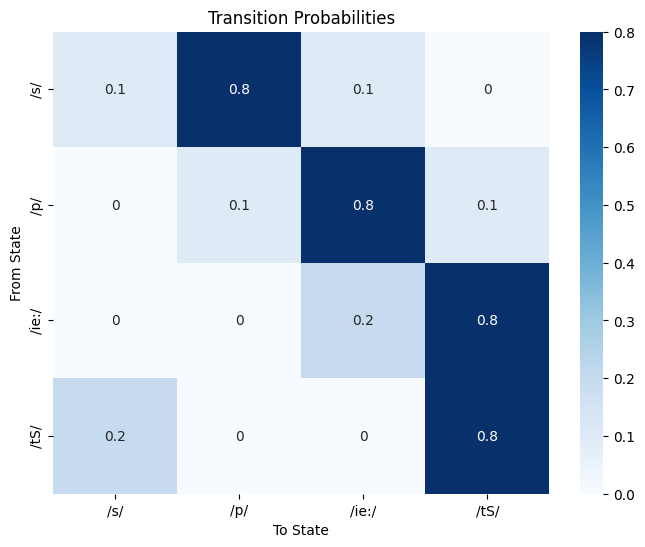

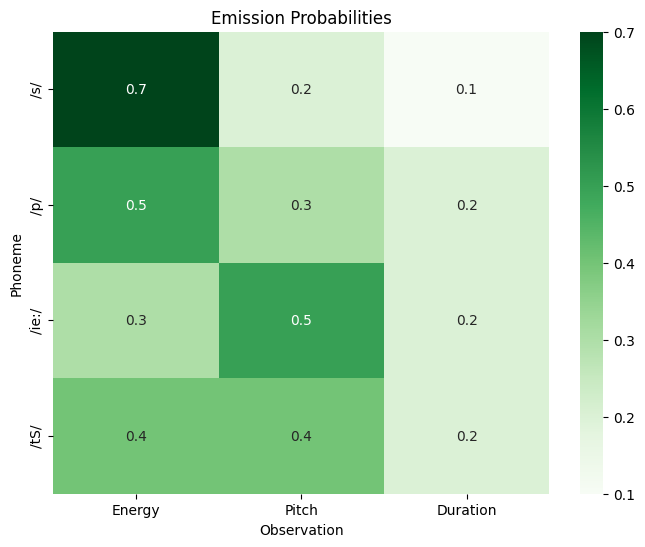

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matrices(transition_prob, emission_prob):
    trans_df = pd.DataFrame(transition_prob).T
    plt.figure(figsize=(8,6))
    sns.heatmap(trans_df, annot=True, cmap='Blues')
    plt.title('Transition Probabilities')
    plt.ylabel('From State')
    plt.xlabel('To State')
    plt.show()

    emit_df = pd.DataFrame(emission_prob).T
    plt.figure(figsize=(8,6))
    sns.heatmap(emit_df, annot=True, cmap='Greens')
    plt.title('Emission Probabilities')
    plt.ylabel('Phoneme')
    plt.xlabel('Observation')
    plt.show()

plot_matrices(transition_prob, emission_prob)

### Visualizations

**Heatmaps** are used to visualize the transition and emission probabilities:

- **Transition Probabilities Heatmap**: Shows the likelihood of transitioning from one phoneme to another.
- **Emission Probabilities Heatmap**: Displays the probability of emitting a particular observation given a phoneme.

These visualizations aid in comprehending the relationships and probabilities within the HMM.

In [6]:
np.random.seed(33)

phoneme_seq, observation_seq = generate_sequence(initial_prob, transition_prob, emission_prob, observations, length=4)

print("Generated Phoneme Sequence:", phoneme_seq)
print("Corresponding Observations:", observation_seq)

Generated Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/ie:/']
Corresponding Observations: ['Energy', 'Energy', 'Energy', 'Duration']


### Expected Output Alignment

By setting a random seed, we ensure reproducibility of the generated sequence. An example output might be:

- Generated Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/tS/']
- Corresponding Observations: ['Energy', 'Energy', 'Energy', 'Duration']


This aligns with the expected phoneme sequence for the word "speech".